## Assignment : 14

<pre>
1. Download the preprocessed DonorsChoose data from here <a href='https://drive.google.com/file/d/1GU3LIJJ3zS1xLXXe-sdItSJHtI5txjVO/view?usp=sharing'>Dataset</a>
2. Split the data into train, cv, and test
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric. you need to print the AUC value for each epoch. Note: you should NOT use the tf.metric.auc
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. You should Save the best model weights.
8. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
9. Use Categorical Cross Entropy as Loss to minimize.
10. try to get AUC more than 0.8 for atleast one model
</pre>

### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [0]:
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
input_layer = Input(shape=(n,))
embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

### Model-2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data feature 'essay' <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

### Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

In [0]:
from numpy import asarray
import numpy as np
from google.colab import drive
import pandas as pd
from tqdm import tqdm
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten,LSTM
from keras.layers import Dense,Input
from keras.layers.embeddings import Embedding
from sklearn.preprocessing import Normalizer
from keras.layers import concatenate,Dropout,BatchNormalization
from keras.models import Model
import tensorflow as tf
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from tensorboardcolab import *

In [3]:
drive.mount('/content/gdrive')

project_data = pd.read_csv("./gdrive/My Drive/Colab Notebooks/preprocessed_data.csv")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [47]:
project_data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


<h3>converting each categorical features to numeric</h3>

In [4]:
# Converting categorical project grade to numeric
grade_dict = {}
k = 0
for s in project_data['project_grade_category'].values:
  rank = grade_dict.get(s,-1)
  if(rank == -1):
    grade_dict[s] = k
    k += 1
print("Total number of unique grade. {}".format(len(grade_dict.keys())))

def grade_numeric(x):
  return grade_dict[x]

grade_feat = project_data['project_grade_category'].map(grade_numeric)
project_data['numeric_project_grade_category'] = grade_feat

Total number of unique grade. 4


In [5]:
# Converting categorical clean_categories to numerical features.
sub_dict = {}
k = 0
for s in project_data['clean_categories'].values:
  is_present = sub_dict.get(s,-1)
  if(is_present == -1):
    sub_dict[s] = k
    k += 1
print("Total number of unique subject category. {}".format(len(sub_dict.keys())))

def subject_numeric(x):
  return sub_dict[x]

sub_feat = project_data['clean_categories'].map(subject_numeric)
project_data['numeric_clean_categories'] = sub_feat

Total number of unique subject category. 51


In [6]:
# Converting clean sub_categories to numerical features.
ssub_dict = {}
k = 0
for s in project_data['clean_subcategories'].values:
  is_present = ssub_dict.get(s,-1)
  if(is_present == -1):
    ssub_dict[s] = k
    k += 1
print("Total number of unique subject subcategory. {}".format(len(ssub_dict.keys())))

def ssub_numeric(x):
  return ssub_dict[x]

subject_sub_feat = project_data['clean_subcategories'].map(ssub_numeric)
project_data['numeric_clean_subcategories'] = subject_sub_feat

Total number of unique subject subcategory. 401


In [7]:
# Converting categorical teacher prefix to numerical
teacher_dict = {}
k = 0
for s in project_data['teacher_prefix'].values:
  is_present = teacher_dict.get(s,-1)
  if(is_present == -1):
    teacher_dict[s] = k
    k += 1
print("Total number of unique teacher prefix. {}".format(len(teacher_dict.keys())))

def teacher_numeric(x):
  return teacher_dict[x]
  
teacher_feat = project_data['teacher_prefix'].map(teacher_numeric)
project_data['numeric_teacher_prefix'] = teacher_feat


Total number of unique teacher prefix. 5


In [8]:
# Converting categorical features of school to numerical features.
ss_dict = {} # This will store  school state with their numerical value
school_state = project_data['school_state'].values
k = 0
for s in school_state:
  is_present = ss_dict.get(s,-1)
  if(is_present == -1):
    ss_dict[s] = k
    k += 1
print("Total number of unique school states. {}".format(len(ss_dict.keys())))
def ss_numerical(x):
  return ss_dict[x]

state_feat = project_data['school_state'].map(ss_numerical)
project_data['numeric_school_state'] = state_feat

Total number of unique school states. 51


<h3> split project_data into train, cv and test datasets</h3>

In [0]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
X=project_data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)

In [0]:
# For project_grade_category
grade_train = X_train['numeric_project_grade_category'].values.reshape(-1,1)
grade_test = X_test['numeric_project_grade_category'].values.reshape(-1,1)
grade_cv = X_cv['numeric_project_grade_category'].values.reshape(-1,1)

# For clean_categories
cat_train = X_train['numeric_clean_categories'].values.reshape(-1,1)
cat_test = X_test['numeric_clean_categories'].values.reshape(-1,1)
cat_cv = X_cv['numeric_clean_categories'].values.reshape(-1,1)

# For clean_subcategories
sub_cat_train = X_train['numeric_clean_subcategories'].values.reshape(-1,1)
sub_cat_test = X_test['numeric_clean_subcategories'].values.reshape(-1,1)
sub_cat_cv = X_cv['numeric_clean_subcategories'].values.reshape(-1,1)

# for teacher_prefix
teacher_train = X_train['numeric_teacher_prefix'].values.reshape(-1,1)
teacher_test = X_test['numeric_teacher_prefix'].values.reshape(-1,1)
teacher_cv = X_cv['numeric_teacher_prefix'].values.reshape(-1,1)

# For school state
state_train = X_train['numeric_school_state'].values.reshape(-1,1)
state_test = X_test['numeric_school_state'].values.reshape(-1,1)
state_cv = X_cv['numeric_school_state'].values.reshape(-1,1)

<h3>preprocessing essay</h3>

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [14]:
# for essay data
essay_train = preprocess_text(X_train['essay'].values)
essay_test = preprocess_text(X_test['essay'].values)
essay_cv = preprocess_text(X_cv['essay'].values)

100%|██████████| 17480/17480 [00:06<00:00, 2639.99it/s]


<h3>converting each word in essay text to numeric</h3>

In [15]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(essay_train)
X_train_seq = tokenizer.texts_to_sequences(essay_train)
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1
max_len = 600
# padding the vectors of each datapoint to fixed length of 600.
X_train_tokens = pad_sequences(X_train_seq,maxlen = max_len,padding='post')

# integer encode sequences of words
X_cv_seq = tokenizer.texts_to_sequences(essay_cv)
max_len = 600
# padding the vectors of each datapoint to fixed length of 600.
X_cv_tokens = pad_sequences(X_cv_seq,maxlen = max_len,padding='post')

# integer encode sequences of words
X_test_seq = tokenizer.texts_to_sequences(essay_test)
max_len = 600
# padding the vectors of each datapoint to fixed length of 600.
X_test_tokens = pad_sequences(X_test_seq,maxlen = max_len,padding='post')

print(X_train_tokens.shape)
print(X_cv_tokens.shape)
print(X_test_tokens.shape)

(69918, 600)
(17480, 600)
(21850, 600)


In [16]:
#f = open("./gdrive/My Drive/glove_vectors",'rb')

# we will load the whole glove vectors .
embeddings_index = {}
f = open("./gdrive/My Drive/glove.42B.300d.txt",'r',encoding="utf-8")
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

# Credit : https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Loaded 1917495 word vectors.


<h3> Input layer, embedding layer, LSTM and flattening for encoded essay text</h3>

In [17]:
# For essay data
input_layer1 = Input(shape=(600,))
embedding = Embedding(vocab_size, 300, input_length=max_len, weights=[embedding_matrix], trainable=False)(input_layer1)

lstm_out1 = LSTM(64,return_sequences=True)(embedding)
lstm_out2 = LSTM(128,return_sequences=True)(lstm_out1)
lstm_out = Flatten()(lstm_out2)

<h3> embedding layer and flattening for each encode categorical features</h3>

In [0]:
# For project_grade_category
from keras.layers import Flatten
input_layer2 = Input(shape=(1,))
e1 = Embedding(4,32,input_length=1)(input_layer2)#no. of unique grade category is 4
flatten1 = Flatten()(e1)

In [0]:
# For clean_categories
input_layer3 = Input(shape=(1,))
e2 = Embedding(51,32,input_length=1)(input_layer3)#no. of unique clean categories is 51
flatten2 = Flatten()(e2)

In [0]:
# For clean_subcategories
input_layer4 = Input(shape=(1,))
e3 = Embedding(401,32,input_length=1)(input_layer4)#no. of unique clean subcategories is 401
flatten3 = Flatten()(e3)

In [0]:
# For teacher_prefix
input_layer5 = Input(shape=(1,))
e4 = Embedding(5,32,input_length=1)(input_layer5)#no. of unique teacher prefix is 5
flatten4 = Flatten()(e4)

In [0]:
# for school state
input_layer6 = Input(shape=(1,))
e5 = Embedding(51,32,input_length=1)(input_layer6)#no. of unique school state is 51
flatten5 = Flatten()(e5)

<h3>Normalizing the numerical features: price</h3>

In [23]:
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(69918, 1) (69918,)
(17480, 1) (17480,)
(21850, 1) (21850,)


<h3>Normalizing the numerical features: teacher_number_of_previously_projects</h3>

In [24]:
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_tnppp_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_tnppp_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_tnppp_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_tnppp_norm.shape, y_train.shape)
print(X_cv_tnppp_norm.shape, y_cv.shape)
print(X_test_tnppp_norm.shape, y_test.shape)
print("="*100)


After vectorizations
(69918, 1) (69918,)
(17480, 1) (17480,)
(21850, 1) (21850,)


<h3>concating all the numerical features using hstack</h3>

In [25]:
X_train_rem = np.hstack((X_train_price_norm, X_train_tnppp_norm))
X_cv_rem = np.hstack((X_cv_price_norm, X_cv_tnppp_norm))
X_test_rem = np.hstack((X_test_price_norm, X_test_tnppp_norm))

print("Final Data matrix")
print(X_train_rem.shape, y_train.shape)
print(X_cv_rem.shape, y_cv.shape)
print(X_test_rem.shape, y_test.shape)

Final Data matrix
(69918, 2) (69918,)
(17480, 2) (17480,)
(21850, 2) (21850,)


<h3>Input layer and Dense hidden layer for above concated numerical features</h3>

In [0]:
# For cocatenated features
input_layer7 = Input(shape=(2,))
rem_feat_dense = Dense(64, activation='relu')(input_layer7)

# Model 1

In [27]:
# credict : https://keras.io/getting-started/functional-api-guide/
# Trying out the first architecture

x = concatenate([lstm_out,flatten1,flatten2,flatten3,flatten4,flatten5,rem_feat_dense])

# We stack a deep densely-connected network on top
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Dense(64,activation='relu')(x)

main_output = Dense(2, activation='softmax')(x)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model = Model(inputs=[input_layer1,input_layer2,input_layer3,input_layer4,input_layer5,input_layer6,input_layer7], outputs=[main_output])

In [0]:
# Credict: https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras

def aucroc(y_true, y_pred):
    # Getting the actual y in a list
    actual_y = tf.map_fn(lambda x: x[0] ,y_true)
    # Using sklearn "roc_auc_score" to get roc_auc.
    return tf.py_func(roc_auc_score, (actual_y, y_pred[:,1]), tf.double)

In [74]:
from tensorboardcolab import *
tbc = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://c50720c5.ngrok.io


In [75]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=[aucroc],loss_weights=[1.])

model.fit([X_train_tokens,grade_train,cat_train,sub_cat_train,teacher_train,state_train,X_train_rem], [y_train], epochs=8, batch_size=512,
           callbacks=[TensorBoardColabCallback(tbc)], validation_data=([X_cv_tokens,grade_cv,cat_cv,sub_cat_cv,teacher_cv,state_cv,X_cv_rem], [y_cv]))

Train on 69918 samples, validate on 17480 samples
Epoch 1/8
69918/69918 [==============================] - 1268s 18ms/step - loss: 0.4253 - aucroc: 0.6355 - val_loss: 0.3836 - val_aucroc: 0.7245
Epoch 2/8
69918/69918 [==============================] - 1233s 18ms/step - loss: 0.3843 - aucroc: 0.7170 - val_loss: 0.3765 - val_aucroc: 0.7384
Epoch 3/8
69918/69918 [==============================] - 1216s 17ms/step - loss: 0.3756 - aucroc: 0.7359 - val_loss: 0.3775 - val_aucroc: 0.7278
Epoch 4/8
69918/69918 [==============================] - 1220s 17ms/step - loss: 0.3698 - aucroc: 0.7468 - val_loss: 0.3711 - val_aucroc: 0.7450
Epoch 5/8
69918/69918 [==============================] - 1222s 17ms/step - loss: 0.3638 - aucroc: 0.7572 - val_loss: 0.3655 - val_aucroc: 0.7536
Epoch 6/8
69918/69918 [==============================] - 1218s 17ms/step - loss: 0.3581 - aucroc: 0.7685 - val_loss: 0.3703 - val_aucroc: 0.7496
Epoch 7/8
69918/69918 [==============================] - 1220s 17ms/step - loss:

In [76]:
score = model.evaluate([X_test_tokens,grade_test,cat_test,sub_cat_test,teacher_test,state_test,X_test_rem],
                       [y_test],batch_size=512)
print('Test score:', score[0]) 
print('Test AUC :', score[1])

21850/21850 [==============================] - 99s 5ms/step
Test score: 0.3811307204315264
Test AUC : 0.7496628754318015


# Model 2

In [0]:
# We will use tfidf to vectorize eaasy data and will remove those words which have very high or very low idf values.
# We will fit the vectorizer on train data and will use it on cv and test dataset.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)
vectorizer.fit_transform(X_train['essay'].values)
# This returnsthe idf value of all the words.
idf_value = vectorizer.idf_
# This returns the name of all the words
all_words = vectorizer.get_feature_names()

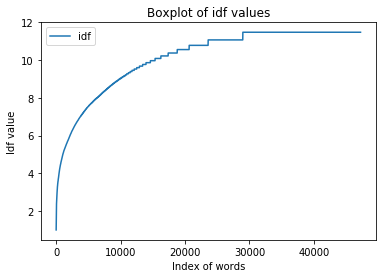

In [78]:
# Plotting box plot of idf values.
sorted_idf = np.sort(idf_value)#to sort idf value
x = [i for i in range(len(idf_value))]
plt.plot(x,sorted_idf,label='idf')
plt.xlabel("Index of words")
plt.ylabel("Idf value")
plt.title("Boxplot of idf values")
plt.legend()
plt.show()

In [79]:
word_dict = {}
for i in range(len(idf_value)):
  if idf_value[i]>=4 and idf_value[i]<=10:
    word_dict[all_words[i]] = idf_value[i]
                                   
print(len(word_dict))                                   

14891


In [80]:
#for train datapoints
new_train_text = []
for sentence in tqdm(essay_train):
  new_sentence = " "
  for word in sentence.split():
    word_found = word_dict.get(word,-1)
    if word_found>0:
      new_sentence+=word+" "
  
  new_train_text.append(new_sentence)
  
#for cv datapoints
new_cv_text = []
for sentence in tqdm(essay_cv):
  new_sentence = " "
  for word in sentence.split():
    word_found = word_dict.get(word,-1)
    if word_found>0:
      new_sentence+=word+" "
  
  new_cv_text.append(new_sentence)
  
#for text datapoints
new_test_text = []
for sentence in tqdm(essay_test):
  new_sentence = " "
  for word in sentence.split():
    word_found = word_dict.get(word,-1)
    if word_found>0:
      new_sentence+=word+" "
  
  new_test_text.append(new_sentence)  

100%|██████████| 21850/21850 [00:01<00:00, 13742.11it/s]


In [81]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_train_text)
X_train_seq = tokenizer.texts_to_sequences(new_train_text)
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1
max_len = 400
# padding the vectors of each datapoint to fixed length of 600.
X_train_tokens_cnn = pad_sequences(X_train_seq,maxlen = max_len,padding='post')

# integer encode sequences of words
X_cv_seq = tokenizer.texts_to_sequences(new_cv_text)
# padding the vectors of each datapoint to fixed length of 600.
X_cv_tokens_cnn = pad_sequences(X_cv_seq,maxlen = max_len,padding='post')

# integer encode sequences of words
X_test_seq = tokenizer.texts_to_sequences(new_test_text)
# padding the vectors of each datapoint to fixed length of 600.
X_test_tokens_cnn = pad_sequences(X_test_seq,maxlen = max_len,padding='post')

print(X_train_tokens_cnn.shape)
print(X_cv_tokens_cnn.shape)
print(X_test_tokens_cnn.shape)

(69918, 400)
(17480, 400)
(21850, 400)


In [0]:
# Credit : https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

<h3> Input layer, embedding layer, LSTM and flattening for encoded essay text</h3>

In [0]:
# For essay data
input_layer_new = Input(shape=(400,))
embedding = Embedding(vocab_size, 300, input_length=max_len, weights=[embedding_matrix], trainable=False)(input_layer_new)

lstm_out1 = LSTM(64,return_sequences=True)(embedding)
lstm_out2 = LSTM(128,return_sequences=True)(lstm_out1)
lstm_out_new = Flatten()(lstm_out2)

In [0]:
# credict : https://keras.io/getting-started/functional-api-guide/
# Trying out the first architecture

x = concatenate([lstm_out_new,flatten1,flatten2,flatten3,flatten4,flatten5,rem_feat_dense])

# We stack a deep densely-connected network on top
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(32,activation='relu')(x)

main_output = Dense(2, activation='softmax')(x)

In [0]:
model = Model(inputs=[input_layer_new,input_layer2,input_layer3,input_layer4,input_layer5,input_layer6,input_layer7], outputs=[main_output])

In [86]:
tbc = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://c50720c5.ngrok.io


In [87]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=[aucroc],loss_weights=[1.])

model.fit([X_train_tokens_cnn,grade_train,cat_train,sub_cat_train,teacher_train,state_train,X_train_rem], [y_train], epochs=6, batch_size=512,
           callbacks=[TensorBoardColabCallback(tbc)], validation_data=([X_cv_tokens_cnn,grade_cv,cat_cv,sub_cat_cv,teacher_cv,state_cv,X_cv_rem], [y_cv]))

Train on 69918 samples, validate on 17480 samples
Epoch 1/6
69918/69918 [==============================] - 767s 11ms/step - loss: 0.4702 - aucroc: 0.5727 - val_loss: 0.4036 - val_aucroc: 0.6789
Epoch 2/6
69918/69918 [==============================] - 760s 11ms/step - loss: 0.4080 - aucroc: 0.6627 - val_loss: 0.3969 - val_aucroc: 0.6991
Epoch 3/6
69918/69918 [==============================] - 765s 11ms/step - loss: 0.4007 - aucroc: 0.6807 - val_loss: 0.3960 - val_aucroc: 0.7018
Epoch 4/6
69918/69918 [==============================] - 777s 11ms/step - loss: 0.3957 - aucroc: 0.6946 - val_loss: 0.3949 - val_aucroc: 0.7129
Epoch 5/6
69918/69918 [==============================] - 767s 11ms/step - loss: 0.3896 - aucroc: 0.7075 - val_loss: 0.4437 - val_aucroc: 0.7135
Epoch 6/6
69918/69918 [==============================] - 774s 11ms/step - loss: 0.3865 - aucroc: 0.7131 - val_loss: 0.3846 - val_aucroc: 0.7172


In [88]:
score = model.evaluate([X_test_tokens_cnn,grade_test,cat_test,sub_cat_test,teacher_test,state_test,X_test_rem],
                       [y_test],batch_size=512)
print('Test score:', score[0]) 
print('Test AUC :', score[1])

21850/21850 [==============================] - 64s 3ms/step
Test score: 0.3863066413500762
Test AUC : 0.7152759812228051


<h2>Model-3</h2>

<h3>Normalizing the numerical features: Price</h3>

In [30]:
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(69918, 1) (69918,)
(17480, 1) (17480,)
(21850, 1) (21850,)


<h3>Normalizing the numerical features: teacher_number_of_previously_posted_projects</h3>

In [31]:
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_tnppp_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_tnppp_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_tnppp_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_tnppp_norm.shape, y_train.shape)
print(X_cv_tnppp_norm.shape, y_cv.shape)
print(X_test_tnppp_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(69918, 1) (69918,)
(17480, 1) (17480,)
(21850, 1) (21850,)


<h3>one hot encoding the catogorical features:clean_categories</h3>

In [32]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)

X_train_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_categories_ohe.shape, y_train.shape)
print(X_cv_categories_ohe.shape, y_cv.shape)
print(X_test_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(69918, 9) (69918,)
(17480, 9) (17480,)
(21850, 9) (21850,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


<h3>one hot encoding the catogorical features: clean_subcategories</h3>

In [33]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)
X_train_sub_categories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_sub_categories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_sub_categories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_sub_categories_ohe.shape, y_train.shape)
print(X_cv_sub_categories_ohe.shape, y_cv.shape)
print(X_test_sub_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(69918, 30) (69918,)
(17480, 30) (17480,)
(21850, 30) (21850,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


<h3>one hot encoding the catogorical features: school_state</h3>

In [34]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(69918, 51) (69918,)
(17480, 51) (17480,)
(21850, 51) (21850,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3>one hot encoding the catogorical features: teacher_prefix</h3>

In [35]:
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(69918, 5) (69918,)
(17480, 5) (17480,)
(21850, 5) (21850,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


<h3>one hot encoding the catogorical features: project_grade_category</h3>

In [36]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)
print(vectorizer.get_feature_names())


X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
print(X_train_grade_ohe.shape, y_train.shape)

X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
print(X_cv_grade_ohe.shape, y_cv.shape)

X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)
print(X_test_grade_ohe.shape, y_test.shape)

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
(69918, 4) (69918,)
(17480, 4) (17480,)
(21850, 4) (21850,)


<h3>Concatinating all the categorical and numerical features</h3>

In [37]:
from scipy.sparse import hstack,csr_matrix
X_tr_cat = hstack((X_train_categories_ohe, X_train_sub_categories_ohe, X_train_teacher_ohe, X_train_state_ohe, X_train_grade_ohe, X_train_price_norm, X_train_tnppp_norm))
               
X_cv_cat = hstack((X_cv_categories_ohe, X_cv_sub_categories_ohe, X_cv_teacher_ohe, X_cv_state_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_tnppp_norm))

X_te_cat = hstack((X_test_categories_ohe, X_test_sub_categories_ohe, X_test_teacher_ohe, X_test_state_ohe, X_test_grade_ohe, X_test_price_norm, X_test_tnppp_norm))

print("Final Data matrix")
print(X_tr_cat.shape, y_train.shape)
print(X_cv_cat.shape, y_cv.shape)
print(X_te_cat.shape, y_test.shape)
print("="*100)

Final Data matrix
(69918, 101) (69918,)
(17480, 101) (17480,)
(21850, 101) (21850,)


In [38]:
import numpy as np
X_tr_cat1 = X_tr_cat.toarray()
X_tr_cat  = np.reshape(X_tr_cat1,X_tr_cat1.shape + (1,))

X_cv_cat1 = X_cv_cat.toarray()
X_cv_cat  = np.reshape(X_cv_cat1,X_cv_cat1.shape + (1,))

X_te_cat1 = X_te_cat.toarray()
X_te_cat = np.reshape(X_te_cat1,X_te_cat1.shape + (1,))

print(X_tr_cat.shape)
print(X_cv_cat.shape)
print(X_te_cat.shape)

(69918, 101, 1)
(17480, 101, 1)
(21850, 101, 1)


In [0]:
import keras
from keras.layers import Conv1D
input_layer_cnn = Input(shape=(101,1))
conv1 = Conv1D(32, 3, activation='relu')(input_layer_cnn)

conv2 = Conv1D(54, 3, activation='relu')(conv1)

conv3 = Conv1D(84, 3, activation='relu')(conv2)

conv4 = Conv1D(112, 3, activation='relu')(conv3)

flatten_con = Flatten()(conv4)

In [0]:
# credict : https://keras.io/getting-started/functional-api-guide/
# Trying out the first architecture

x = concatenate([lstm_out,flatten_con])

# We stack a deep densely-connected network on top
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(64,activation='relu')(x)

main_output = Dense(2, activation='softmax')(x)

In [0]:
model = Model(inputs=[input_layer1,input_layer_cnn], outputs=[main_output])

In [44]:
tbc = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://790eb149.ngrok.io


In [45]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=[aucroc],loss_weights=[1.])

model.fit([X_train_tokens,X_tr_cat], [y_train], epochs=4, batch_size=512, callbacks=[TensorBoardColabCallback(tbc)], 
          validation_data=([X_cv_tokens,X_cv_cat], [y_cv]))


Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 69918 samples, validate on 17480 samples


Epoch 1/4
69918/69918 [==============================] - 1183s 17ms/step - loss: 0.4059 - aucroc: 0.6732 - val_loss: 0.3955 - val_aucroc: 0.7254
Epoch 2/4
69918/69918 [============

In [46]:
score = model.evaluate([X_test_tokens,X_te_cat], [y_test], batch_size=512)
print('Test score:', score[0]) 
print('Test AUC :', score[1])

21850/21850 [==============================] - 100s 5ms/step
Test score: 0.3788366698700449
Test AUC : 0.7396574669128284


# Conclusion

In [47]:
from prettytable import PrettyTable

x = PrettyTable(['Model','Train AUC','Validation AUC','Test AUC'])
x.add_row(['Model1','0.7917','0.7522','0.7496'])
x.add_row(['Model2','0.8028','0.7221','0.7107'])
x.add_row(['Model3','0.7131','0.7172','0.7152'])
print(x)

+--------+-----------+----------------+----------+
| Model  | Train AUC | Validation AUC | Test AUC |
+--------+-----------+----------------+----------+
| Model1 |   0.7917  |     0.7522     |  0.7496  |
| Model2 |   0.8028  |     0.7221     |  0.7107  |
| Model3 |   0.7131  |     0.7172     |  0.7152  |
+--------+-----------+----------------+----------+


<h3>1.In model-1 and model-2 i have used activation function "sigmoid" while for model-3 i have used activation function "relu"</h3>
<h3>2.In model-1 i have used all words in whole data corpus and tokenize to numeric integer using keras tokenizer and for model-2 i have taken words based on tf-idf , selected words which moderate tf-idf values and for text in data corpus makes new sentances with those words which have moderate tf-idf values(not too high and not too less).</h3>
<h3>3.In model-3 for all features in data corpus except text features applied one hot enncoding to encode each features and concatenated all the features using hstack.Applied convolutional layer(1D) on top of it.</h3>
<h3>4.for getting aucroc value with each epoch i have tensonboard callback</h3>
<h3>5.I enjoyed lot while doing this assignment.LSTM is indeed one of best algorithm in whole deep learning.</h3>
  